# Fitting Metcalfe's Law for Crypto Assets

According to [Metcalfe's Law](https://en.wikipedia.org/wiki/Metcalfe%27s_law) a value of networks is proportinal to the number of possible connection between their particpants. As each partcipant can have _n-1_ connection, the value of the network, not cosidering the cost of the network, is :
> V=A*n*(n-1)/2

If n is large and K=A/2 :  

> V=K*n^2

The aim of this notebook is to back test is assumption. 

To change the coins, or the wallet constrains, change the __coins__ and __metrics__ arrays down below. 

The data is downloaded from [coinmetrics](https://charts.coinmetrics.io/formulas/) and saved to [data/wallets over X USD.csv]( https://github.com/bekisz/chaintelligence/data/wallets.csv)

In [1]:
import pandas as pd

plot_start_date = '2009-01-01'
fromDate = '2008-01-01'
smas = [7,30,90,180, 365,21*7, 50*7,100*7,  200*7]
displayed_sma_days=100*7
# https://data.nasdaq.com/ token to use nasdaqdatalink for M2 money supply
nasdaqdatalink_token = 'JEn6xy3nc1JtFSLoXoVJ'


#df = pd.read_csv('data/wallets over X USD.csv', encoding = "utf-16", sep='\t')
df = pd.read_csv('data/AddrBal1in1Bv5.csv', encoding = "utf-16", sep='\t')
df['Time']= pd.to_datetime(df['Time'])
df.set_index(['Time'],inplace=True, verify_integrity = True, drop = True)
df = df[fromDate:]
df.tail(2)

,BTC.PriceUSD,BTC.CapRealUSD,BTC.AdrBal1in1BCnt,ETH.PriceUSD,ETH.CapRealUSD,ETH.AdrBal1in1BCnt,LTC.PriceUSD,LTC.CapRealUSD,LTC.AdrBal1in1BCnt,ADA.PriceUSD,...,DOGE.AdrBal1in1BCnt,BTC.AdrBal1in10MCnt,ETH.AdrBal1in10MCnt,LTC.AdrBal1in10MCnt,ADA.AdrBal1in10MCnt,DASH.AdrBal1in10MCnt,ZEC.AdrBal1in10MCnt,XRP.AdrBal1in10MCnt,ALGO.AdrBal1in10MCnt,DOGE.AdrBal1in10MCnt
Time,,,,,,,,,,,,,,,,,,,,,
2023-06-11,25906.828152,3.919659e+11,9144261,1751.833681,1.616128e+11,4540608.0,77.550256,6.920312e+09,1745905.0,0.272096,...,1549123.0,550279,290031.0,294418.0,391795.0,131927.0,93831.0,267983.0,142200.0,166766.0
2023-06-12,25906.751935,3.919201e+11,9133528,1742.452934,1.614539e+11,4536399.0,77.583198,6.914697e+09,1726723.0,0.275225,...,1548771.0,550349,289985.0,294504.0,392357.0,131933.0,93728.0,268300.0,142548.0,16680.0


In [2]:

# ---  Coins to Analyze ----
# all
#coins = ['YFI','ZEC','ETH','ADA','ETC','LTC', 'BTC','MKR', 'BTG',"AAVE","MATICETH", "MANA", "UNI", "COMP","BAL","BAT", "SUSHI", "DOGE","1INCH", 'LINK']

# coins = [ 'BTC','ADA', 'ETH','MKR','LTC', 'ETC','LINK','ALGO','XRP', 'XLM', 'AAVE']

#coins = [ 'BTC','ETH','AAVE','COMP', 'UNI','LINK']

#coins = [ 'BTC','ETH','AAVE','LINK','UNI']

coins = [ 'BTC','LTC','DOGE','DASH', 'ZEC', 'ETH','ADA','XRP','ALGO']
#coins = [ 'BTC','ADA', 'ETH','LTC','DASH', 'DOGE','ZEC','ETC']

# ---------------------------------------------------------------------
# Wallets over x USDs : 
#metrics = ['AdrBalUSD1MCnt','AdrBalUSD10KCnt', 'AdrBalUSD1KCnt', 'AdrBalUSD100Cnt'] 
# Wallets over nth of total coins : 
# metrics = ['AdrBal1in10BCnt','AdrBal1in1BCnt', 'AdrBal1in100MCnt', 'AdrBal1in10MCnt']

# A good enough commitment is to hold at least 1000 USD 
#metrics = ['AdrBalUSD100Cnt'] 
metrics = ['AdrBal1in1BCnt','AdrBal1in10MCnt'] 

#metrics = ['AdrBalUSD100Cnt', 'AdrBalUSD1KCnt','AdrBalUSD10KCnt'] 
#metrics = ['AdrBalUSD1KCnt'] 



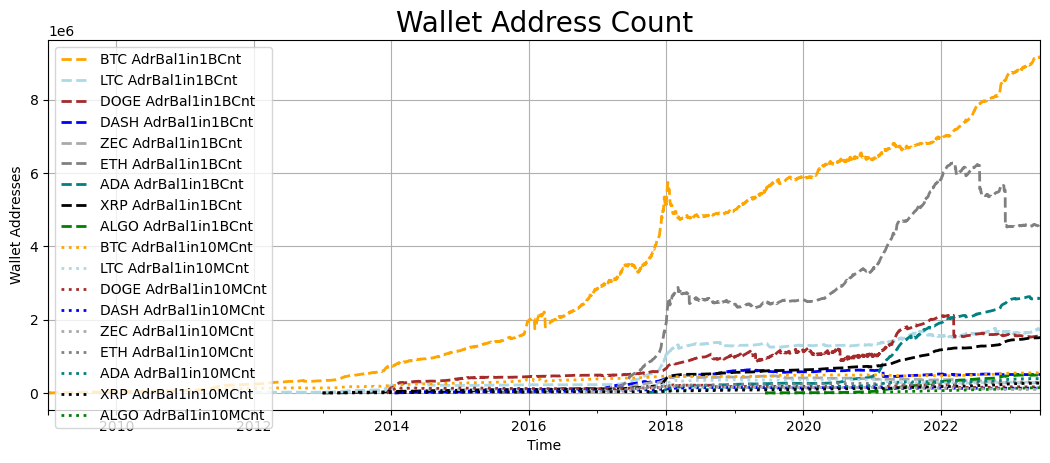

In [3]:
import matplotlib.pyplot as plt

metric_linestyles = {
    'AdrBal1in10BCnt':'-',
    'AdrBal1in1BCnt':'--',
    'AdrBal1in100MCnt':'-.',    
    'AdrBal1in10MCnt':':',    
    'AdrBalUSD1MCnt':'-',
    'AdrBalUSD100KCnt':'-.',
    'AdrBalUSD10KCnt':'-.',
    'AdrBalUSD1KCnt':'-',    
    'AdrBalUSD100Cnt':'-',       
}
coin_colors = {
    'BTC':'orange',
    'ETH':'grey',
    'AAVE':'purple',
    'LTC':'lightblue',
    'MKR':'lightgreen',
    'MATICETH':'blue',
    'BAL':'brown',
    'CRV': 'red',
    'ETC' : 'lightgreen',
    'ADA':'teal',
    'LINK' : 'darkblue',
    'XRP' : 'black',
    'XLM' : 'grey',
    'ALGO' : 'green',
    'BTG' : 'gold',
    'BAL' : 'brown',
    'SUSHI': 'magenta',
    'COMP' : 'green',
    'DOGE': 'brown',
    'BAT': 'crimson',
    'MANA': 'deeppink',
    '1INCH': 'hotpink',
    'ZEC': 'darkgrey',
    'YFI' : 'darkorange',
    'UNI': 'pink',
    'DASH': 'blue',
    
    
}
coin_max_supply = {
    'BTC': 21000000,
    'ETH': 122373866, # total supply as of 2023.01.01
    'AAVE':16000000,
    'LTC': 84000000,
    'MKR': 1005577,
    'MATICETH': 10000000000, # MATIC on ETH chan only
    'UNI':1000000000,
    'LDO':1000000000,
    'DASH':18900*1000,
    'BAL': 96150704,
    'CRV': 3303030299,
    'ETC' : 210000000,
    'ADA': 45000000000,
    'BIFI' :80000,
    'LINK' : 1000000000,
    'XRP' : 100* 1000000000,
    'XLM' : 50001806812,
    'ALGO' : 10*1000000000,
    'BTG' : 21000000,
    'SUSHI': 250000000,
    'COMP' : 10000000,
    'DOGE': 132670764300, # total supply as of 2023.01.01
    'BAT': 1500000000,
    'MANA': 2193539027, # total supply as of 2023.01.01
    '1INCH': 1500000000,
    'ZEC': 21000000,
    'YFI' : 36666
    
}

F = plt.gcf()
DefaultSize = F.get_size_inches()

plt.title("Wallet Address Count", fontsize=20)
plt.ylabel("Wallet Addresses")
for metric in metrics:
    for coin in coins: 
        df[coin + '.' + metric].plot(c=coin_colors[coin],label=coin + ' ' + metric,linewidth=2, ls = metric_linestyles[metric])

plt.grid()
plt.legend(loc='upper left')
#plt.ylim((0,25000))
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*1) )


In [4]:
import nasdaqdatalink

def convert_to_m2(df,dt):
    iloc_idx = df.index.get_indexer([dt], method='nearest')  # returns absolute index into df e.g. array([5])
    loc_idx = df.index[iloc_idx]                             # if you want named index
    return df.loc[loc_idx,'Value'].values[0] 

wm2ns = nasdaqdatalink.get("FED/M2_N_WM", authtoken=nasdaqdatalink_token)    
df_m2 = pd.DataFrame(wm2ns)
df.loc(axis=1)[('USD_m2_supply')]  = df.index.map(lambda dt: convert_to_m2(df_m2,dt))
btc_birthday = pd.to_datetime('2009-01-03')
m2_supply_at_genesis = convert_to_m2(df_m2,btc_birthday)

df.loc(axis=1)[('USD_m2_supply_index')] = df.loc(axis=1)[('USD_m2_supply')]/m2_supply_at_genesis


for coin in coins:
    df.loc(axis=1)[(coin+'_Price_m2')] = df.loc(axis=1)[(coin+'.PriceUSD')] /df.loc(axis=1)[('USD_m2_supply_index')]
#    df.loc(axis=1)[(coin+'_CapMrktCurUSD_m2')] = df.loc(axis=1)[(coin+'_CapMrktCurUSD')] /df.loc(axis=1)[('USD_m2_supply_index')]
    df.loc(axis=1)[(coin+'_CapRealUSD_m2')] = df.loc(axis=1)[(coin+'.CapRealUSD')] /df.loc(axis=1)[('USD_m2_supply_index')]
    df.loc(axis=1)[(coin+'_CapFDMC_m2')] = coin_max_supply[coin] *df.loc(axis=1)[(coin+'.PriceUSD')] /df.loc(axis=1)[('USD_m2_supply_index')]
    # p = 1.1 # for USD 
    p = 2 # for 1in1B 
    k =0.0015
    # k =10000 # for 1KUSD
    
    #k =25000 # for 10KUSD
    #k =200000 # for 100KUSD
    
    c =0
    df.loc(axis=1)[(coin+'_CapFDMC_m2_metcalfe_1B')] = df.loc(axis=1)[(coin+'.'+metrics[0])].pow(p)*k +c
    
    
    # p = 1.1 # for USD 
    p = 5.5 # for 1in1B 
    k =0.000000000000000000006
    # k =10000 # for 1KUSD
    
    #k =25000 # for 10KUSD
    #k =200000 # for 100KUSD
    
    c =0
    df.loc(axis=1)[(coin+'_CapFDMC_m2_metcalfe_10M')] = df.loc(axis=1)[(coin+'.'+metrics[1])].pow(p)*k +c
    
    # Averages
    for days in smas: 
        df.loc(axis=1)[(coin +'_CapFDMC_m2_'+ str(days) +'d'+ '_sma' )] = \
            df.loc(axis=1)[(coin + '_CapFDMC_m2')].rolling(days).mean()
        df.loc(axis=1)[(coin +'_CapFDMC_m2_metcalfe_1B'+ str(days) +'d'+ '_sma' )] = \
            df.loc(axis=1)[(coin + '_CapFDMC_m2_metcalfe_1B')].rolling(days).mean()
        df.loc(axis=1)[(coin +'_CapFDMC_m2_metcalfe_10M'+ str(days) +'d'+ '_sma' )] = \
            df.loc(axis=1)[(coin + '_CapFDMC_m2_metcalfe_10M')].rolling(days).mean()
        df.loc(axis=1)[(coin +'_CapRealUSD_m2_'+ str(days) +'d'+ '_sma' )] = \
            df.loc(axis=1)[(coin + '_CapRealUSD_m2')].rolling(days).mean()
             
        # df=df.loc['2013-01-01':]


df    
    
#df.loc(axis=1)[(coin,'all', 'm2_adj_price')] = df.loc(axis=1)[('BTC','all', 'price')] /df.loc(axis=1)[('USD','all', 'm2_supply_index')]
df.tail(2)


/var/folders/9j/hrm11jcj7x1bh6c8wqzn08pr0000gn/T/ipykernel_12193/2858084951.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc(axis=1)[(coin +'_CapFDMC_m2_metcalfe_10M'+ str(days) +'d'+ '_sma' )] = \
/var/folders/9j/hrm11jcj7x1bh6c8wqzn08pr0000gn/T/ipykernel_12193/2858084951.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc(axis=1)[(coin +'_CapRealUSD_m2_'+ str(days) +'d'+ '_sma' )] = \
/var/folders/9j/hrm11jcj7x1bh6c8wqzn08pr0000gn/T/ipykernel_12193/2858084951.py:47: PerformanceWarning: DataFrame is highly fr

,BTC.PriceUSD,BTC.CapRealUSD,BTC.AdrBal1in1BCnt,ETH.PriceUSD,ETH.CapRealUSD,ETH.AdrBal1in1BCnt,LTC.PriceUSD,LTC.CapRealUSD,LTC.AdrBal1in1BCnt,ADA.PriceUSD,...,ALGO_CapFDMC_m2_metcalfe_10M350d_sma,ALGO_CapRealUSD_m2_350d_sma,ALGO_CapFDMC_m2_700d_sma,ALGO_CapFDMC_m2_metcalfe_1B700d_sma,ALGO_CapFDMC_m2_metcalfe_10M700d_sma,ALGO_CapRealUSD_m2_700d_sma,ALGO_CapFDMC_m2_1400d_sma,ALGO_CapFDMC_m2_metcalfe_1B1400d_sma,ALGO_CapFDMC_m2_metcalfe_10M1400d_sma,ALGO_CapRealUSD_m2_1400d_sma
Time,,,,,,,,,,,,,,,,,,,,,
2023-06-11,25906.828152,3.919659e+11,9144261,1751.833681,1.616128e+11,4540608.0,77.550256,6.920312e+09,1745905.0,0.272096,...,5.445619e+07,1.725188e+09,2.703217e+09,2.164007e+08,2.841101e+07,3.046688e+09,2.470263e+09,1.113592e+08,1.421011e+07,1.913454e+09
2023-06-12,25906.751935,3.919201e+11,9133528,1742.452934,1.614539e+11,4536399.0,77.583198,6.914697e+09,1726723.0,0.275225,...,5.481319e+07,1.720637e+09,2.698842e+09,2.168401e+08,2.860122e+07,3.043616e+09,2.467383e+09,1.116165e+08,1.430534e+07,1.914076e+09


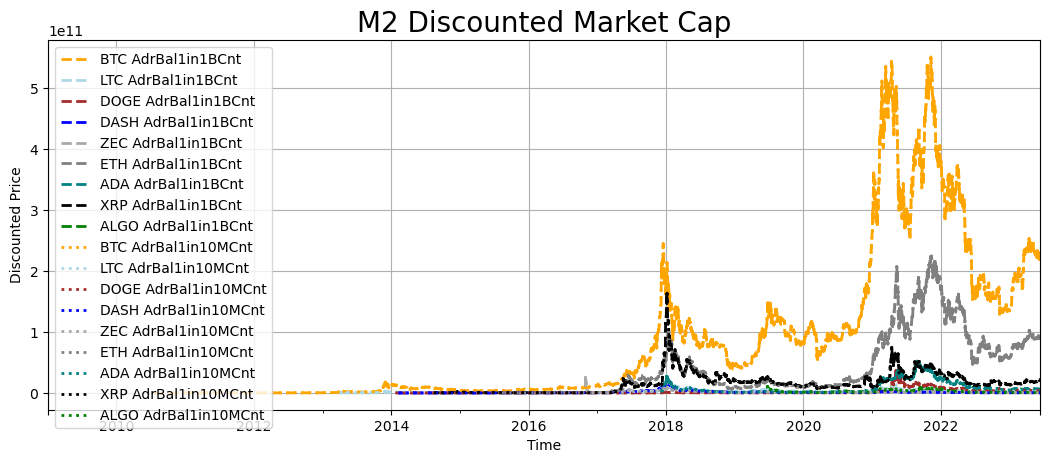

In [5]:
F = plt.gcf()
DefaultSize = F.get_size_inches()

plt.title("M2 Discounted Market Cap", fontsize=20)
plt.ylabel("Discounted Price")
for metric in metrics:
    for coin in coins: 
        df[coin + '_CapFDMC_m2'].plot(c=coin_colors[coin],label=coin + ' ' + metric,linewidth=2, ls = metric_linestyles[metric])

plt.grid()
plt.legend(loc='upper left')
#plt.ylim((0,25000))
#F.set_yscale('log')

F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*1) )

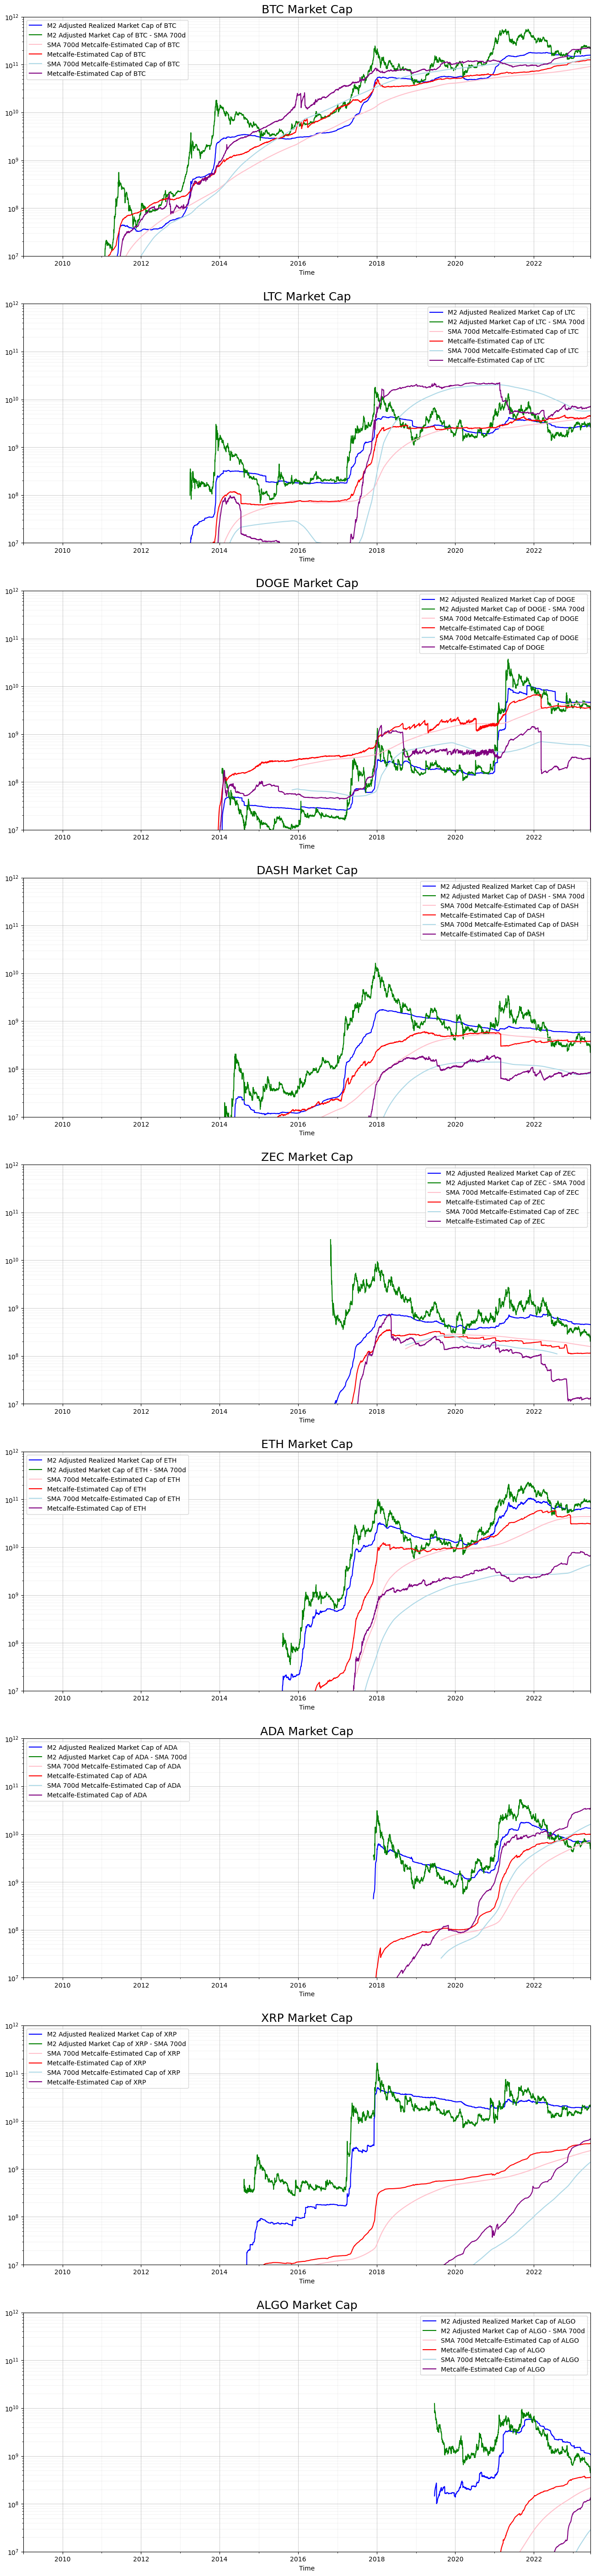

In [6]:
import matplotlib.pyplot as plt

today=df[df['BTC.PriceUSD'] >0 ].index.max()
subplots = len(coins);
fig, axs = plt.subplots(subplots)
fig.set_size_inches(16, 8*subplots)
i=0

for coin in coins: 
    axs[i].set_title("{} Market Cap".format(coin), fontsize=18)
    df[coin + '_CapRealUSD_m2'][plot_start_date:today].plot(c='blue',ax=axs[i],label='M2 Adjusted Realized Market Cap of {}'.format(coin) )

#    df[coin + '_CapRealUSD_m2_'+ str(displayed_sma_days) + 'd_sma'][plot_start_date:today].plot(c=coin_colors[coin],ax=axs[i],label='SMA {}d Market Cap of {}'.format(displayed_sma_days,coin) )
    df[coin + '_CapFDMC_m2'][plot_start_date:today].plot(c='green',ax=axs[i],label='M2 Adjusted Market Cap of {} - SMA {}d'.format(coin,displayed_sma_days))    
                                                       

    df[coin + '_CapFDMC_m2_metcalfe_1B'+ str(displayed_sma_days) + 'd_sma'][plot_start_date:today].plot(c='pink',ax=axs[i],label='SMA {}d Metcalfe-Estimated Cap of {}'.format(displayed_sma_days,coin) )
    df[coin + '_CapFDMC_m2_metcalfe_1B'][plot_start_date:today].plot(c='red',ax=axs[i],label='Metcalfe-Estimated Cap of {}'.format(coin) )

    df[coin + '_CapFDMC_m2_metcalfe_10M'+ str(displayed_sma_days) + 'd_sma'][plot_start_date:today].plot(c='lightblue',ax=axs[i],label='SMA {}d Metcalfe-Estimated Cap of {}'.format(displayed_sma_days,coin) )
    df[coin + '_CapFDMC_m2_metcalfe_10M'][plot_start_date:today].plot(c='purple',ax=axs[i],label='Metcalfe-Estimated Cap of {}'.format(coin) )
    
    axs[i].legend(loc='best')
    axs[i].grid(axis='both', which='major', alpha=0.6)
    axs[i].grid(axis='both', which='minor', alpha=0.15)  
    axs[i].set_ylim([10000000,1000*1000*1000*1000])
    axs[i].set_yscale('log')
    i= i+1



In [7]:

import math
import numpy as np
def quadratic_growth(n,p_0,k):
    return k*n*n
def n_log_n_growth(n,p_0,k):
    return k*n*np.log2(n)

def limited_growth_function_log(t,p_0,k,l):
    return np.log2(l*p_0/( (l-p_0)*(math.e ** (-k*t))+p_0))
def limited_growth_function(t,p_0,k,l):
    return l*p_0/( (l-p_0)*(math.e ** (-k*t))+p_0)
def limited_growth_function_log(t,p_0,k,l):
    return np.log2(l*p_0/( (l-p_0)*(math.e ** (-k*t))+p_0))